#NAME: AARADYA SHIRUMALLA

#ROLL NO.: M25IQT001

#COURSE: M.TECH QUANTUM TECHNOLOGIES (SEM 1)

# **GHZ State (Greenberger–Horne–Zeilinger State)**

A GHZ state is a maximally entangled quantum state involving three or more qubits. It represents one of the strongest forms of multipartite entanglement and is widely used in quantum information theory, quantum communication protocols, and tests of nonclassical correlations.

For an N-qubit system, the general GHZ state is defined as:

$$
\lvert \mathrm{GHZ}_N \rangle
= \frac{1}{\sqrt{2}}
\left( \lvert 0 \rangle^{\otimes N} + \lvert 1 \rangle^{\otimes N} \right)
$$

This state is a coherent superposition where all qubits are simultaneously in state
∣0⟩ and
∣1⟩. Any measurement on a single qubit collapses the entire system due to the fully correlated nature of the entanglement.

Key Properties

- Maximal multipartite entanglement: Entanglement spans all qubits simultaneously.

- Nonlocal correlations: Exhibits strong nonclassical correlations used in GHZ-type Bell inequalities.

- Fragility: Measuring or losing a single qubit destroys global entanglement.

- Symmetry: All qubits play an identical role in the state.

PARTIAL TRACE

The partial trace is a quantum operation used to remove part of a composite system and obtain the reduced density matrix of a subsystem. For a bipartite state, tracing out subsystem B gives:
$$
\rho_A = \mathrm{Tr}_B(\rho_{AB})
$$
This represents the state available to an observer who only has access to subsystem A. When the original system is entangled, the reduced state becomes mixed, even if the global state is pure. Partial trace is essential for analyzing subsystems, studying decoherence, and comparing the fidelity of individual qubits in larger entangled states.

In [1]:
!pip install qiskit==2.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 65.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 71.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 17.6 MB/s eta 0:00:00


In [2]:
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 47.9 MB/s eta 0:00:00


In [3]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=5ff318ef5fcea9cdf57dada3e55ac2272bf2399ba240c8aca0f28a5c12efaf65
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


In [4]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer, AerSimulator
from qiskit.visualization import plot_state_city, plot_bloch_multivector, plot_histogram
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt

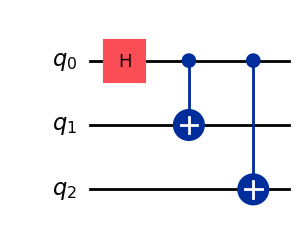

In [5]:
#3-qubit GHZ state
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0, 1)
qc.cx(0, 2)
qc.draw('mpl')

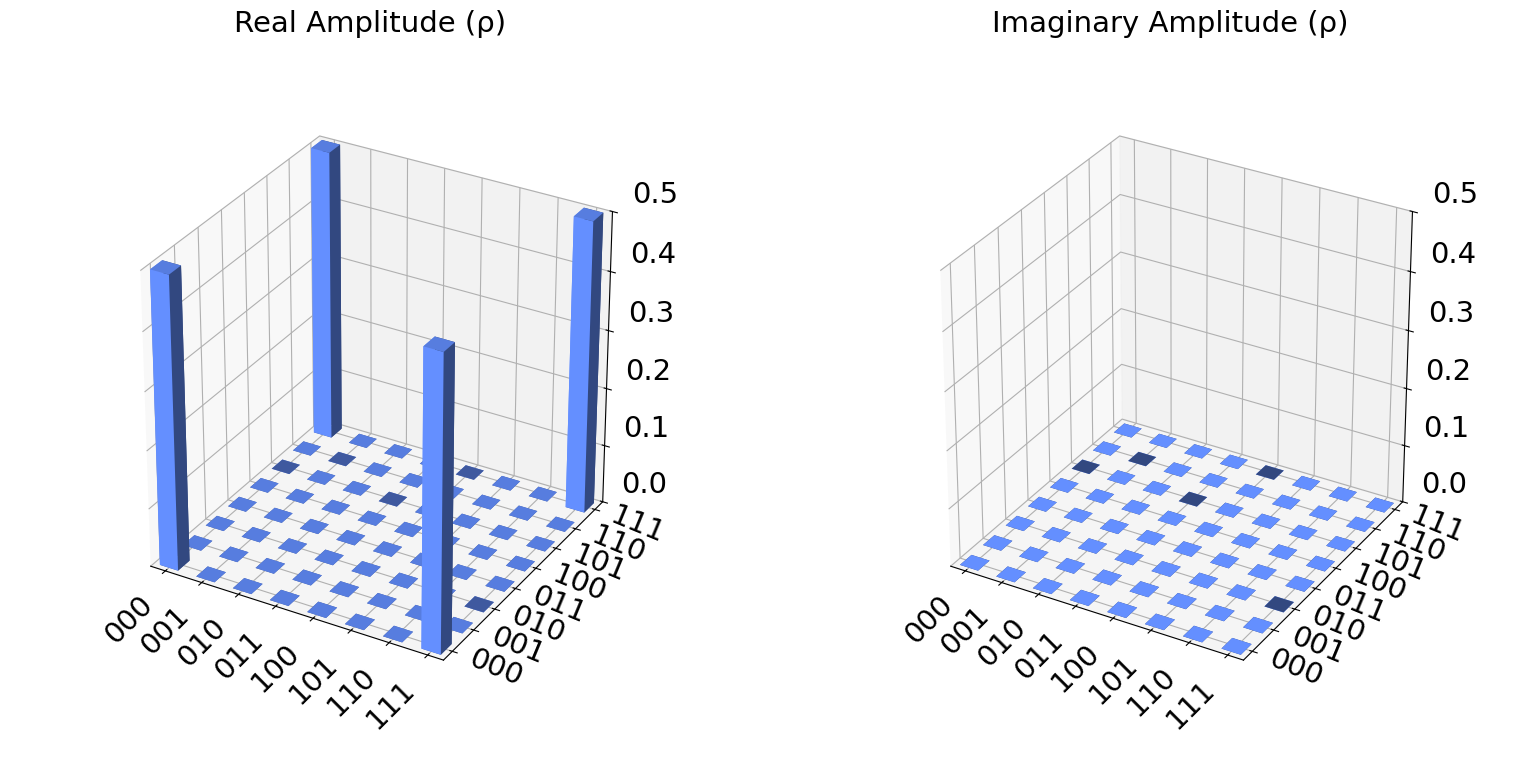

In [6]:
# Get the statevector
sv = Statevector.from_instruction(qc)
plot_state_city(sv)

In [7]:
sv

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.70710678+0.j],
            dims=(2, 2, 2))


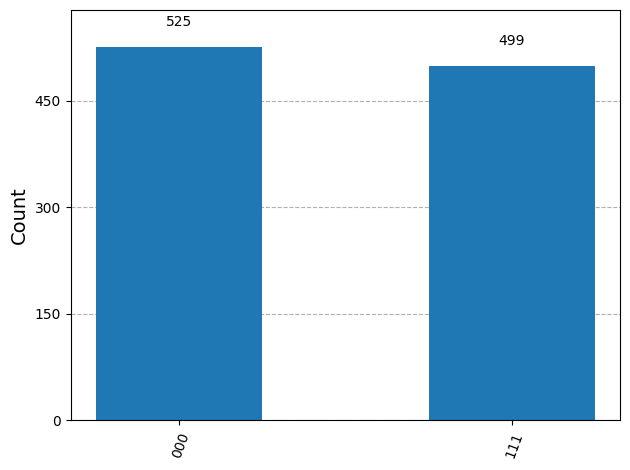

In [8]:
# Measure and show correlations
qc.measure_all()
sim = Aer.get_backend('aer_simulator')
compiled = transpile(qc, sim)
result = sim.run(compiled, shots=1024).result()
counts = result.get_counts()

plot_histogram(counts)

In [9]:
#Partial Trace
from qiskit.quantum_info import partial_trace
reduced = partial_trace(sv, [1, 2])
print(reduced)

DensityMatrix([[0.5+0.j, 0. +0.j],
               [0. +0.j, 0.5+0.j]],
              dims=(2,))


In [10]:
print(reduced.draw("text"))

[[0.5+0.j,0. +0.j],
 [0. +0.j,0.5+0.j]]


In [11]:
# Measure all qubits in X basis: apply H before measurement
qc_x = qc.remove_final_measurements(inplace=False) if hasattr(qc, "remove_final_measurements") else qc.copy()
qc_x = QuantumCircuit(3,3)
qc_x.h(0); qc_x.cx(0,1); qc_x.cx(0,2)
qc_x.h([0,1,2])            # rotate Z->X
qc_x.measure(range(3), range(3))

sim = AerSimulator()
res_x = sim.run(transpile(qc_x, sim), shots=2048).result()
counts_x = res_x.get_counts()

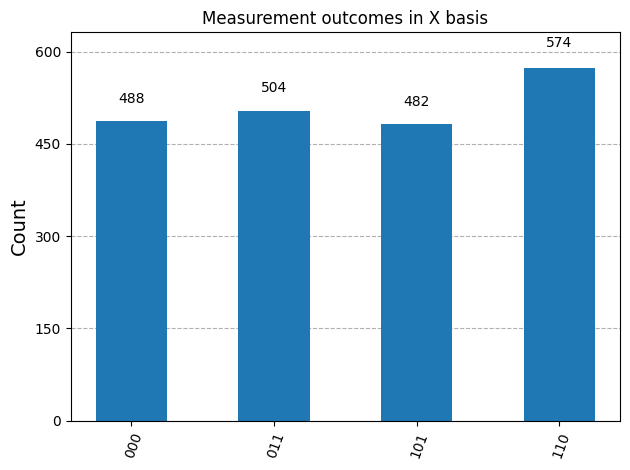

In [12]:
plot_histogram(counts_x, title="Measurement outcomes in X basis")

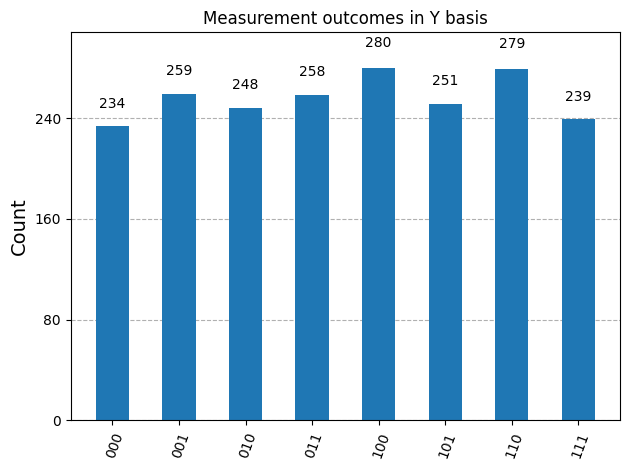

In [13]:
qc_y = qc.remove_final_measurements(inplace=False) if hasattr(qc, "remove_final_measurements") else qc.copy()
qc_y = QuantumCircuit(3, 3)
qc_y.h(0)
qc_y.cx(0, 1)
qc_y.cx(0, 2)

# Rotate measurement basis from Y -> Z
qc_y.sdg([0, 1, 2])   # Rotate phase backwards
qc_y.h([0, 1, 2])     # Then apply Hadamard

# Now measure in Z (which corresponds to Y basis)
qc_y.measure(range(3), range(3))

# Simulate
sim = AerSimulator()
compiled = transpile(qc_y, sim)
result = sim.run(compiled, shots=2048).result()
counts_y = result.get_counts()

plot_histogram(counts_y, title="Measurement outcomes in Y basis")

> ### Fidelity
> State fidelity measures how close two quantum states are to each other.
> $$
> F(\rho, \sigma) = \langle \psi \lvert \sigma \rvert \psi \rangle
> $$
> A fidelity of **1** means the states are identical, and **0** means they are
> completely different.


In [14]:
from qiskit.quantum_info import state_fidelity, Statevector
qc_f= QuantumCircuit(3,3)
qc_f.h(0)
qc_f.cx(0,1)
qc_f.cx(0,2)
ideal = Statevector.from_label('000').evolve(qc_f)
f = state_fidelity(ideal, sv)   # or statevector if you have sv
print("Fidelity to ideal GHZ:", f)

Fidelity to ideal GHZ: 0.9999999999999996


## von Neumann Entropy
von Neumann entropy is used to understand how mixed or entangled different parts of the quantum state are.

First, a partial trace is used to obtain the reduced state of qubit 0:
$$
\rho_0 = \mathrm{Tr}_{1,2}(\rho)
$$

The entropy of this reduced state,
$$
S(\rho_0) = -\mathrm{Tr}\!\left( \rho_0 \log_2 \rho_0 \right)
$$

tells how strongly qubit 0 is entangled with the other qubits.

- S=0: Pure, o entanglement
- S=1: maximally entangles

Then the entropy of the whole 3-qubit state is computed:
$$S(\rho) = -\mathrm{Tr}\!\left( \rho \log_2 \rho \right)$$

If it is zero, the total state is pure other wise noise or measurement have made it mixed.

In [15]:
from qiskit.quantum_info import entropy
from qiskit.quantum_info import DensityMatrix

# reduced for qubit 0:
red0 = partial_trace(sv, [1,2])
print("S(qubit0) =", entropy(red0, base=2))

# whole state
print("S(whole) =", entropy(DensityMatrix(sv), base=2))


S(qubit0) = 1.0
S(whole) = 1.4415419267167124e-15


# Mermin Expectation

The Mermin expectation for a GHZ state captures how strongly this state violates local realism. When you evaluate the Mermin operator on a GHZ state, the result reaches the maximal value allowed by quantum mechanics, far exceeding anything that classical hidden-variable theories could produce. This makes the GHZ state an especially striking example of multipartite nonlocality: instead of relying on statistical inequalities, it demonstrates an “all-or-nothing’’ conflict between quantum predictions and any classical explanation. The Mermin expectation thus serves as a clear indicator of the GHZ state’s uniquely strong, genuinely tripartite quantum correlations

In [16]:
from qiskit.quantum_info import SparsePauliOp, Statevector

qcm = QuantumCircuit(3)
qcm.h(0)
qcm.cx(0, 1)
qcm.cx(0, 2)
sv = Statevector.from_instruction(qcm)  # the GHZ statevector
ops = [
    ('XXX', 1.0),
    ('XYY', -1.0),
    ('YXY', -1.0),
    ('YYX', -1.0)
]
sp = SparsePauliOp.from_list(ops)
expect = sv.expectation_value(sp)
print("Mermin expectation:", expect.real)

Mermin expectation: 3.999999999999999


# GHZ STATE: Noise Sensitivity (Fidelity vs. Depolarizing Noise)

A GHZ state is highly sensitive to noise because its quantum correlations are spread across all qubits in a genuinely multipartite way. When depolarizing noise acts on the system, even a small amount disrupts the delicate phase coherence that distinguishes the GHZ superposition from a classical mixture. As the noise level increases, the state rapidly loses its ability to exhibit the strong nonclassical signatures such as maximal entanglement and nonlocality that make GHZ states useful for quantum information tasks. This fragility means that GHZ states degrade more quickly than many other entangled states under uniform noise, making them valuable probes of noise but also challenging resources to preserve in practical quantum devices.


In [5]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error
from qiskit.quantum_info import Statevector, DensityMatrix, state_fidelity
import matplotlib.pyplot as plt
import numpy as np

In [6]:
qcn = QuantumCircuit(3)
qcn.h(0)
qcn.cx(0, 1)
qcn.cx(0, 2)

sv_ideal = Statevector.from_instruction(qcn)
rho_ideal = DensityMatrix(sv_ideal)

In [7]:
# Simulator backend
backend = AerSimulator(method='density_matrix')

# Noise strength values
noise_strengths = np.linspace(0, 0.2, 11)
fidelities = []

In [10]:
for p in noise_strengths:

    noise = NoiseModel()

    if p > 0:
        # 1-qubit depolarizing
        err1 = depolarizing_error(p, 1)

        # independent noise on each CX qubit
        err_cx = err1.tensor(err1)

        noise.add_all_qubit_quantum_error(err1, ['h'])
        noise.add_all_qubit_quantum_error(err_cx, ['cx'])

    qc_save = qcn.copy()
    qc_save.save_density_matrix()   # <-- FIXED (no label)

    sim = AerSimulator(method='density_matrix', noise_model=noise)
    job = sim.run(transpile(qc_save, sim))
    result = job.result()

    # Retrieve saved density matrix
    rho_noisy = result.data(0)['density_matrix']

    # Fidelity
    f = state_fidelity(rho_ideal, rho_noisy)
    fidelities.append(f)

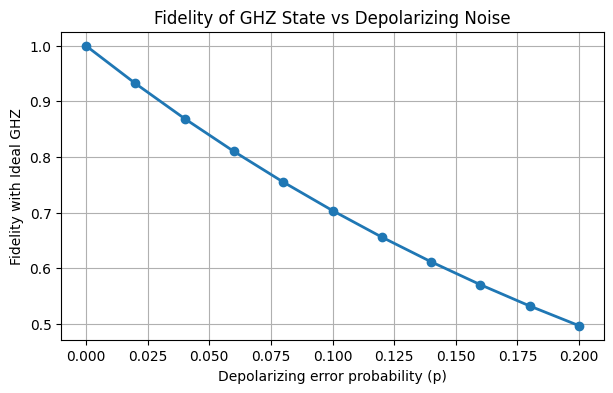

In [11]:
plt.figure(figsize=(7,4))
plt.plot(noise_strengths, fidelities, 'o-', lw=2)
plt.title("Fidelity of GHZ State vs Depolarizing Noise")
plt.xlabel("Depolarizing error probability (p)")
plt.ylabel("Fidelity with Ideal GHZ")
plt.grid(True)
plt.show()

In [12]:
print("Ideal GHZ density matrix:")
print(rho_ideal.data)

Ideal GHZ density matrix:
[[0.5+0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0.5+0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0.5+0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0.5+0.j]]


In [15]:
print(f"\nNoisy density matrix at p={p}:")
print(rho_noisy)


Noisy density matrix at p=0.2:
DensityMatrix([[0.333  +0.j, 0.     +0.j, 0.     +0.j, 0.     +0.j,
                0.     +0.j, 0.     +0.j, 0.     +0.j, 0.16384+0.j],
               [0.     +0.j, 0.045  +0.j, 0.     +0.j, 0.     +0.j,
                0.     +0.j, 0.     +0.j, 0.     +0.j, 0.     +0.j],
               [0.     +0.j, 0.     +0.j, 0.077  +0.j, 0.     +0.j,
                0.     +0.j, 0.     +0.j, 0.     +0.j, 0.     +0.j],
               [0.     +0.j, 0.     +0.j, 0.     +0.j, 0.045  +0.j,
                0.     +0.j, 0.     +0.j, 0.     +0.j, 0.     +0.j],
               [0.     +0.j, 0.     +0.j, 0.     +0.j, 0.     +0.j,
                0.045  +0.j, 0.     +0.j, 0.     +0.j, 0.     +0.j],
               [0.     +0.j, 0.     +0.j, 0.     +0.j, 0.     +0.j,
                0.     +0.j, 0.077  +0.j, 0.     +0.j, 0.     +0.j],
               [0.     +0.j, 0.     +0.j, 0.     +0.j, 0.     +0.j,
                0.     +0.j, 0.     +0.j, 0.045  +0.j, 0.     +0.j],
         

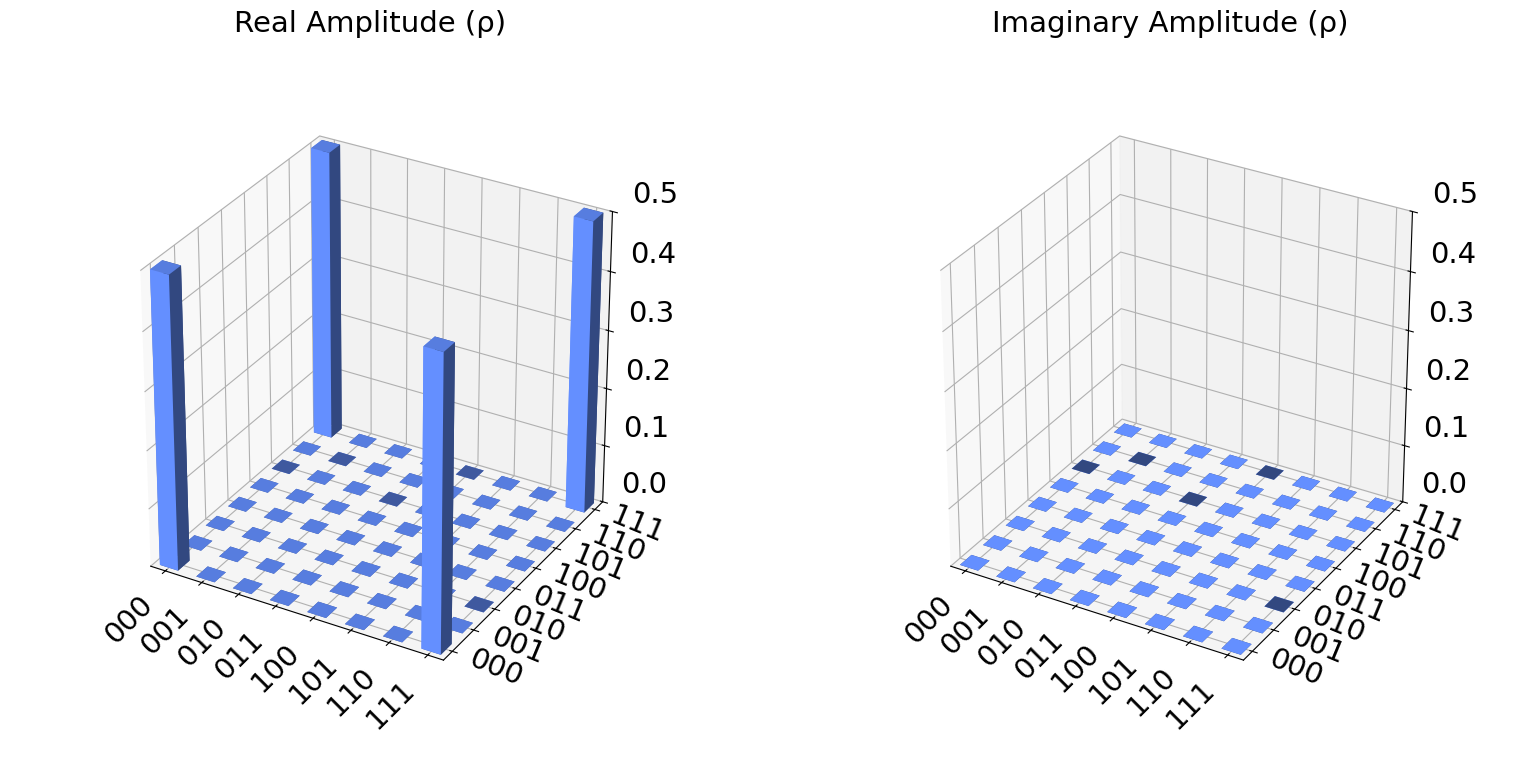

In [17]:
plot_state_city(rho_ideal)

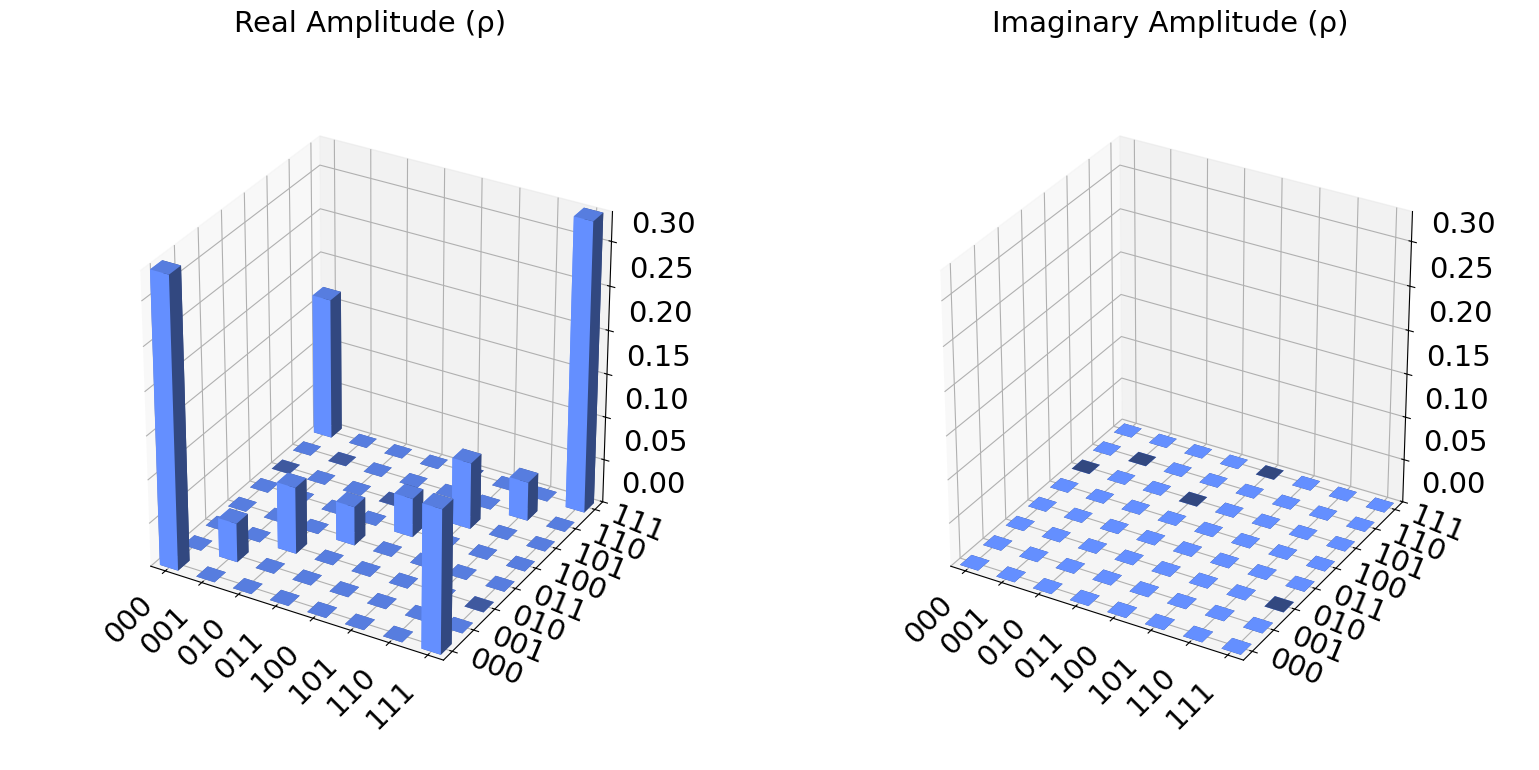

In [18]:
plot_state_city(rho_noisy)

In [19]:
qcn2 = QuantumCircuit(3)
qcn2.h(0)
qcn2.cx(0, 1)
qcn2.cx(0, 2)

sv_ideal = Statevector.from_instruction(qcn2)
rho_ideal = DensityMatrix(sv_ideal)

In [20]:
# Simulator backend
backend = AerSimulator(method='density_matrix')

# Noise strength values
noise_strengths = np.linspace(0, 1.0, 21)
fidelities = []

In [21]:
for p in noise_strengths:

    noise = NoiseModel()

    if p > 0:
        # 1-qubit depolarizing
        err1 = depolarizing_error(p, 1)

        # independent noise on each CX qubit
        err_cx = err1.tensor(err1)

        noise.add_all_qubit_quantum_error(err1, ['h'])
        noise.add_all_qubit_quantum_error(err_cx, ['cx'])

    qc_save = qcn2.copy()
    qc_save.save_density_matrix()   # <-- FIXED (no label)

    sim = AerSimulator(method='density_matrix', noise_model=noise)
    job = sim.run(transpile(qc_save, sim))
    result = job.result()

    # Retrieve saved density matrix
    rho_noisy = result.data(0)['density_matrix']

    # Fidelity
    f = state_fidelity(rho_ideal, rho_noisy)
    fidelities.append(f)

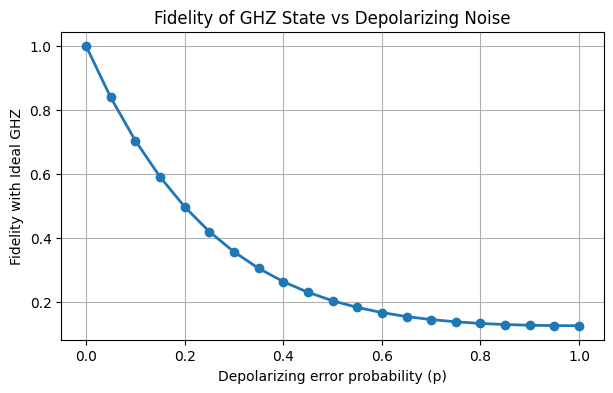

In [22]:
plt.figure(figsize=(7,4))
plt.plot(noise_strengths, fidelities, 'o-', lw=2)
plt.title("Fidelity of GHZ State vs Depolarizing Noise")
plt.xlabel("Depolarizing error probability (p)")
plt.ylabel("Fidelity with Ideal GHZ")
plt.grid(True)
plt.show()

# Parity oscillations / phase kick: demonstrate phase sensitivity and coherence by inserting a phase Rz(θ) on one qubit and plotting expectation of parity vs θ.

Parity-oscillation and phase-kick checks probe the phase coherence that defines a GHZ state. By applying a controllable phase rotation to one qubit, the entire multipartite superposition responds collectively, causing the measured parity to oscillate as the phase is varied. These oscillations reveal that the qubits share a single global phase relationship, something that cannot arise from classical correlations. The visibility and periodicity of the oscillations serve as a direct indicator of how coherent and well-prepared the GHZ state is: strong, clean oscillations imply robust entanglement, whereas reduced contrast signals decoherence or noise in the state preparation.

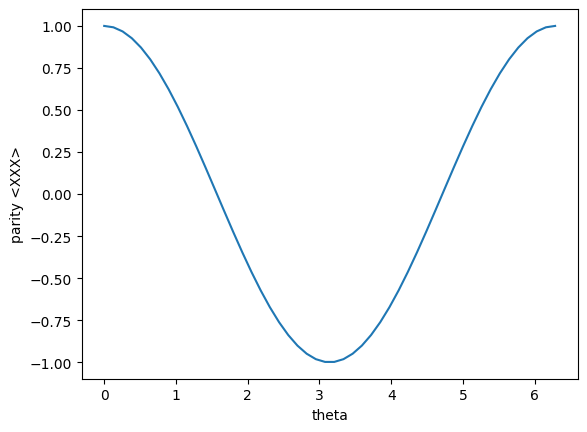

In [25]:
import numpy as np
thetas = np.linspace(0, 2*np.pi, 50)
parities = []
for th in thetas:
    qc_theta = QuantumCircuit(3)
    qc_theta.h(0); qc_theta.cx(0,1); qc_theta.cx(0,2)
    qc_theta.rz(th, 0)             # apply phase on qubit 0
    sv_th = Statevector.from_instruction(qc_theta)
    # parity = <XXX> for example, compute expectation
    par = sv_th.expectation_value(SparsePauliOp.from_list([('XXX',1.0)])).real
    parities.append(par)
plt.plot(thetas, parities)
plt.xlabel('theta'); plt.ylabel('parity <XXX>')
plt.show()

# GHZ vs W state

The W state is written as:
$$
\lvert W_3 \rangle
= \frac{1}{\sqrt{3}}
\left(
\lvert 001 \rangle +
\lvert 010 \rangle +
\lvert 100 \rangle
\right)
$$


In [5]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, DensityMatrix, state_fidelity, partial_trace
from qiskit.visualization import plot_state_city, plot_bloch_multivector
import matplotlib.pyplot as plt
import numpy as np

In [6]:
ghz = QuantumCircuit(3, name='GHZ')
ghz.h(0)
ghz.cx(0, 1)
ghz.cx(0, 2)

In [16]:
neww = QuantumCircuit(3)

mytheta= 2 * np.arccos(1/np.sqrt(3))

neww.ry(mytheta, 0)
neww.ch(0, 1)
neww.cx(1, 2)
neww.cx(0, 1)
neww.x(0)

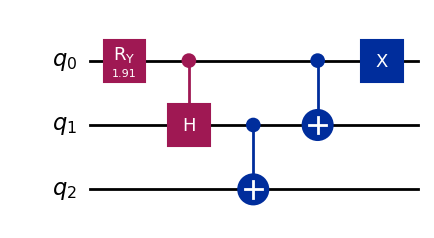

In [17]:
neww.draw('mpl')

In [18]:
#generating statevectors and density matrices
sv_ghz = Statevector.from_instruction(ghz)
sv_w = Statevector.from_instruction(neww)

rho_ghz = DensityMatrix(sv_ghz)
rho_w = DensityMatrix(sv_w)

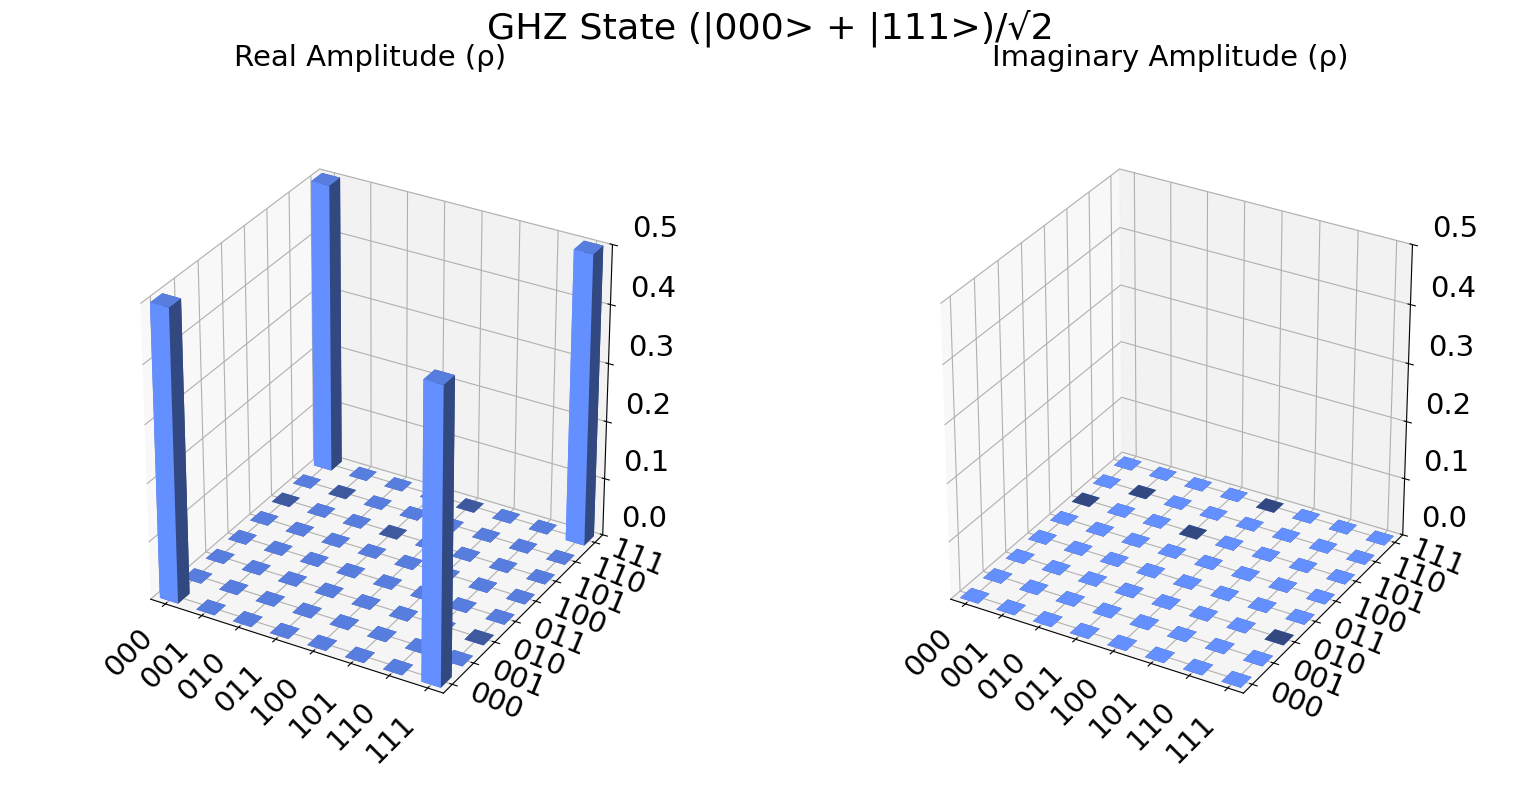

In [10]:
#plotting statevectors
plot_state_city(sv_ghz, title="GHZ State (|000> + |111>)/√2")

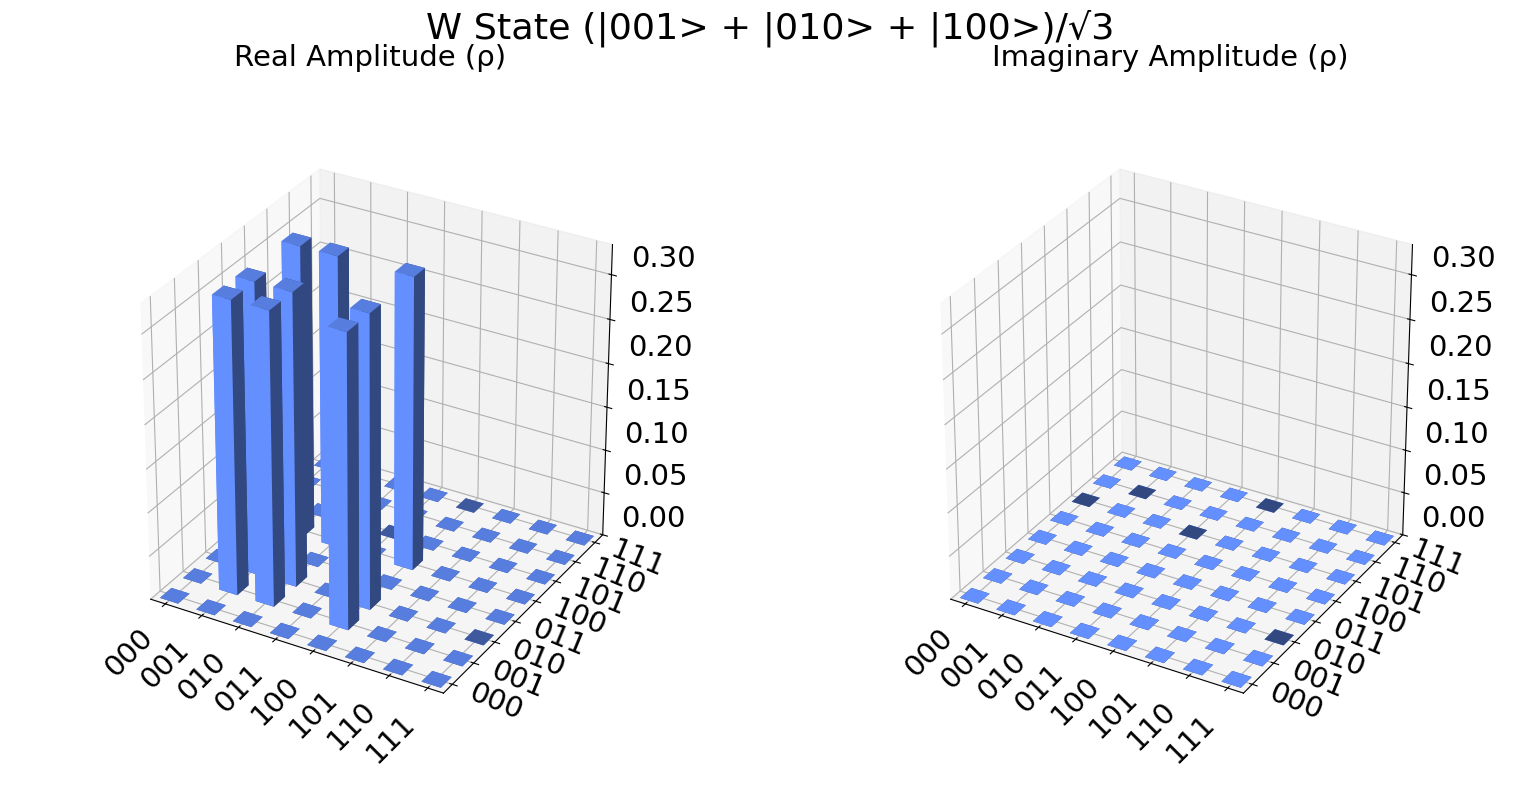

In [19]:
plot_state_city(sv_w, title="W State (|001> + |010> + |100>)/√3")

In [20]:
reduced_ghz = partial_trace(rho_ghz, [2])  # trace out 3rd qubit
reduced_w = partial_trace(rho_w, [2])

In [21]:
purity_ghz = np.trace(reduced_ghz.data @ reduced_ghz.data).real
purity_w = np.trace(reduced_w.data @ reduced_w.data).real

In [22]:
print("Purity of reduced 2-qubit state:")
print(f"  GHZ = {purity_ghz:.3f}  → Highly mixed → fragile entanglement")
print(f"  W   = {purity_w:.3f}  → Partially mixed → more robust entanglement")

Purity of reduced 2-qubit state:
  GHZ = 0.500  → Highly mixed → fragile entanglement
  W   = 0.556  → Partially mixed → more robust entanglement


In [23]:
fidelity_gw = state_fidelity(sv_ghz, sv_w)
print(f"\nFidelity(GHZ, W) = {fidelity_gw:.6f}  (→ Orthogonal, distinct classes)")


Fidelity(GHZ, W) = 0.000000  (→ Orthogonal, distinct classes)


Bloch vector (GHZ single qubit): [0. 0. 0.]
Bloch vector (W single qubit): [0.    0.    0.333]


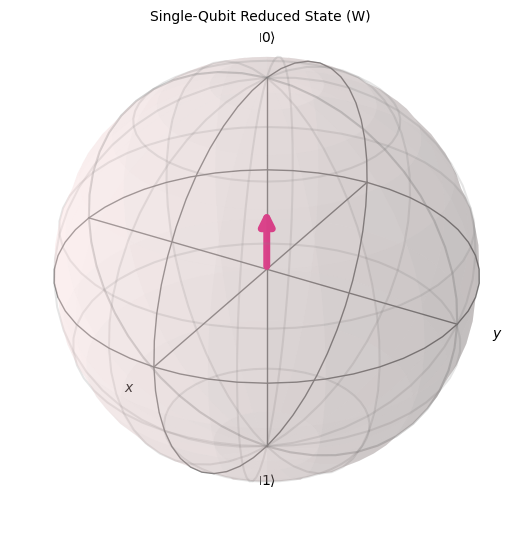

In [24]:
from qiskit.visualization import plot_bloch_vector

def bloch_vector_from_density_matrix(rho):
    """Return Bloch vector [x, y, z] for a 1-qubit density matrix."""
    x = 2 * np.real(rho[0,1])
    y = 2 * np.imag(rho[1,0])
    z = np.real(rho[0,0] - rho[1,1])
    return [x, y, z]

# Reduced single-qubit density matrices (trace out 2 qubits)
rho_ghz_single = partial_trace(rho_ghz, [1,2])
rho_w_single = partial_trace(rho_w, [1,2])

# Compute Bloch vectors
bloch_ghz = bloch_vector_from_density_matrix(rho_ghz_single.data)
bloch_w = bloch_vector_from_density_matrix(rho_w_single.data)

print("Bloch vector (GHZ single qubit):", np.round(bloch_ghz, 3))
print("Bloch vector (W single qubit):", np.round(bloch_w, 3))

# Plot
plot_bloch_vector(bloch_w, title="Single-Qubit Reduced State (W)")


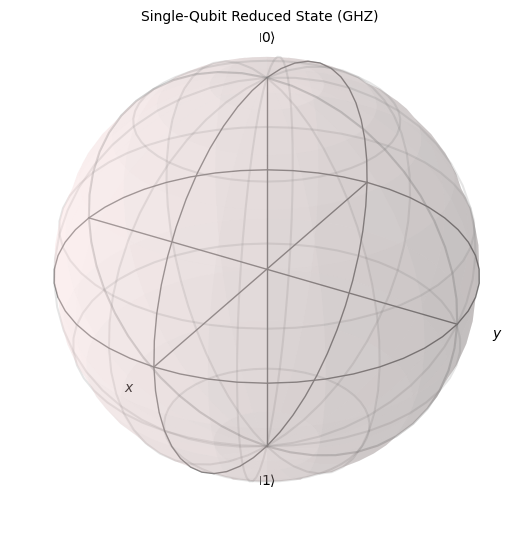

In [25]:
plot_bloch_vector(bloch_ghz, title="Single-Qubit Reduced State (GHZ)")

# **GENERALISED GHZ STATE**

In [39]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, DensityMatrix
from qiskit.visualization import plot_state_city, plot_bloch_multivector
import matplotlib.pyplot as plt

In [40]:
n = int(input("Enter number of qubits for GHZ state: "))

Enter number of qubits for GHZ state: 6


In [41]:
ghz = QuantumCircuit(n, name=f'GHZ_{n}')
ghz.h(0)
for i in range(1, n):
    ghz.cx(0, i)

print("\n--- GHZ Circuit ---")
print(ghz.draw())


--- GHZ Circuit ---
     ┌───┐                         
q_0: ┤ H ├──■────■────■────■────■──
     └───┘┌─┴─┐  │    │    │    │  
q_1: ─────┤ X ├──┼────┼────┼────┼──
          └───┘┌─┴─┐  │    │    │  
q_2: ──────────┤ X ├──┼────┼────┼──
               └───┘┌─┴─┐  │    │  
q_3: ───────────────┤ X ├──┼────┼──
                    └───┘┌─┴─┐  │  
q_4: ────────────────────┤ X ├──┼──
                         └───┘┌─┴─┐
q_5: ─────────────────────────┤ X ├
                              └───┘


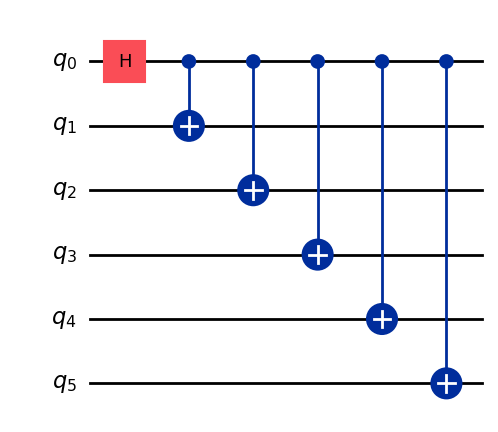

In [43]:
ghz.draw('mpl')

In [44]:
sv_gen = Statevector.from_instruction(ghz)
rho_gen = DensityMatrix(sv_gen)

In [47]:
print(sv_gen)

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +

In [46]:
rho_gen

DensityMatrix([[0.5+0.j, 0. +0.j, 0. +0.j, ..., 0. +0.j, 0. +0.j, 0.5+0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, ..., 0. +0.j, 0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, ..., 0. +0.j, 0. +0.j, 0. +0.j],
               ...,
               [0. +0.j, 0. +0.j, 0. +0.j, ..., 0. +0.j, 0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, ..., 0. +0.j, 0. +0.j, 0. +0.j],
               [0.5+0.j, 0. +0.j, 0. +0.j, ..., 0. +0.j, 0. +0.j, 0.5+0.j]],
              dims=(2, 2, 2, 2, 2, 2))


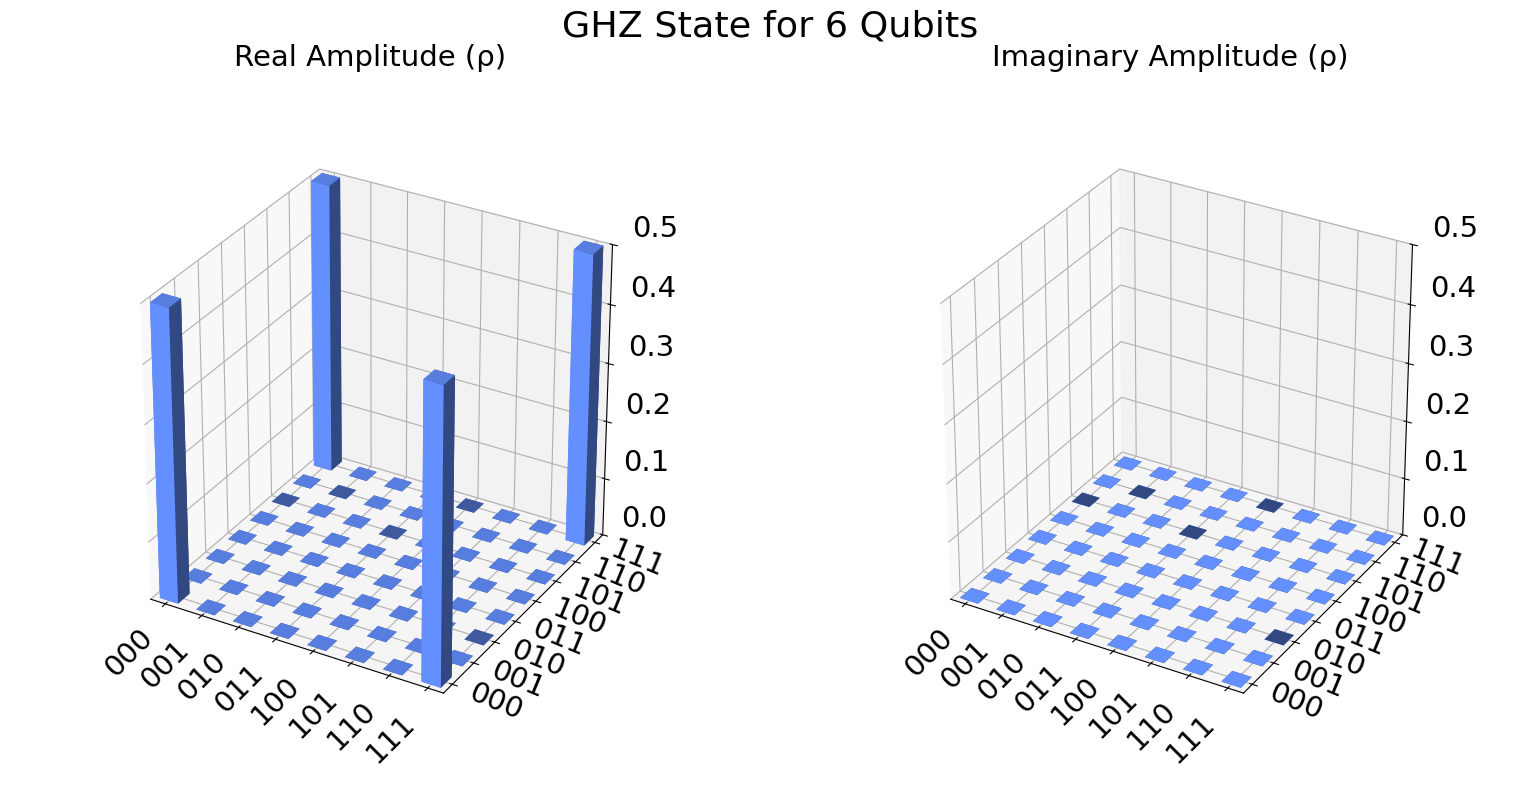

In [48]:
plot_state_city(sv, title=f"GHZ State for {n} Qubits")

In [53]:
from qiskit.visualization import plot_bloch_vector
import numpy as np

if n > 1:
    reduced = partial_trace(rho_gen, list(range(1, n)))  # keep only qubit 0
    reduced_dm = DensityMatrix(reduced)

    # Extract Bloch vector components
    bloch_x = 2 * np.real(reduced_dm.data[0, 1])
    bloch_y = 2 * np.imag(reduced_dm.data[1, 0])
    bloch_z = np.real(reduced_dm.data[0, 0] - reduced_dm.data[1, 1])
    bloch_vec = [bloch_x, bloch_y, bloch_z]

In [52]:
reduced_dm

DensityMatrix([[0.5+0.j, 0. +0.j],
               [0. +0.j, 0.5+0.j]],
              dims=(2,))


In [56]:
print(f"\nSingle-qubit reduced density matrix:\n{reduced_dm}")


Single-qubit reduced density matrix:
DensityMatrix([[0.5+0.j, 0. +0.j],
               [0. +0.j, 0.5+0.j]],
              dims=(2,))


In [58]:
bloch_vec = [float(bloch_x), float(bloch_y), float(bloch_z)]
print(f"Bloch vector: {bloch_vec}")

Bloch vector: [0.0, 0.0, 0.0]


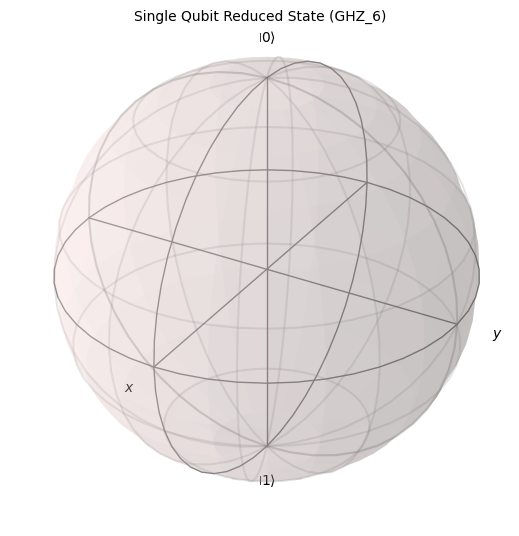

In [60]:
# Plot Bloch vector
plot_bloch_vector(bloch_vec, title=f"Single Qubit Reduced State (GHZ_{n})")

# **4-Fold Coincidence Detection Simulation for GHZ State**

In [4]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector, DensityMatrix
from qiskit.visualization import plot_state_city, plot_histogram
import numpy as np
import matplotlib.pyplot as plt

In [5]:
qc = QuantumCircuit(4)
qc.h(0)
for i in range(1, 4):
    qc.cx(0, i)
qc.measure_all()
print(qc.draw())

        ┌───┐                ░ ┌─┐         
   q_0: ┤ H ├──■────■────■───░─┤M├─────────
        └───┘┌─┴─┐  │    │   ░ └╥┘┌─┐      
   q_1: ─────┤ X ├──┼────┼───░──╫─┤M├──────
             └───┘┌─┴─┐  │   ░  ║ └╥┘┌─┐   
   q_2: ──────────┤ X ├──┼───░──╫──╫─┤M├───
                  └───┘┌─┴─┐ ░  ║  ║ └╥┘┌─┐
   q_3: ───────────────┤ X ├─░──╫──╫──╫─┤M├
                       └───┘ ░  ║  ║  ║ └╥┘
meas: 4/════════════════════════╩══╩══╩══╩═
                                0  1  2  3 


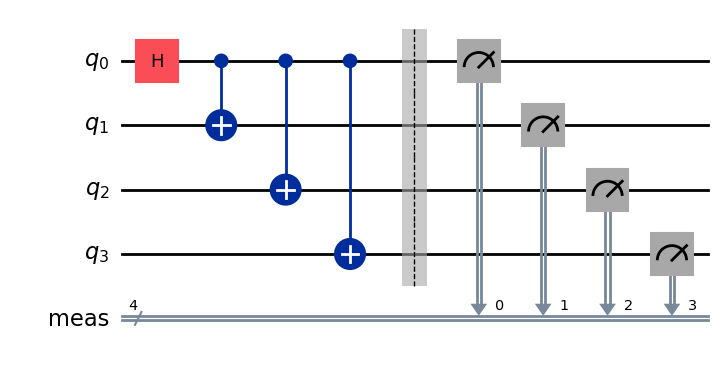

In [6]:
qc.draw('mpl')

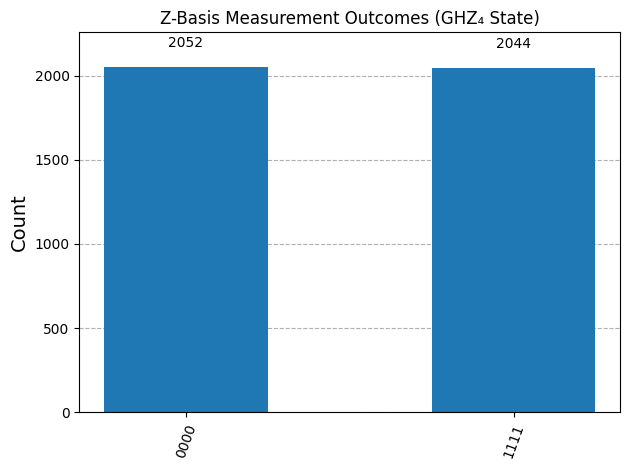

In [7]:
backend = AerSimulator()
job = backend.run(transpile(qc, backend), shots=4096)
result = job.result()
counts = result.get_counts()

# Plot coincidence counts (measurement probabilities)
plot_histogram(counts, title="Z-Basis Measurement Outcomes (GHZ₄ State)")

In [18]:
counts

{'0000': 2052, '1111': 2044}

In [17]:
shots = 4096
P_0000 = counts.get('0000', 0) / shots
P_1111 = counts.get('1111', 0) / shots

print(f"P(0000) = {P_0000:.3f}")
print(f"P(1111) = {P_1111:.3f}")

P(0000) = 0.501
P(1111) = 0.499


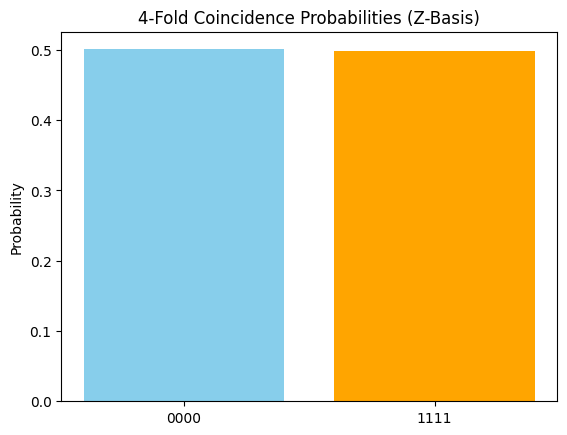

In [8]:
shots = 4096
P_0000 = counts.get('0000', 0) / shots
P_1111 = counts.get('1111', 0) / shots

plt.bar(['0000', '1111'], [P_0000, P_1111], color=['skyblue', 'orange'])
plt.ylabel('Probability')
plt.title('4-Fold Coincidence Probabilities (Z-Basis)')
plt.show()

In [10]:
qc_no_measure = QuantumCircuit(4)
qc_no_measure.h(0)
for i in range(1, 4):
    qc_no_measure.cx(0, i)
sv = Statevector.from_instruction(qc_no_measure)
rho = DensityMatrix(sv)

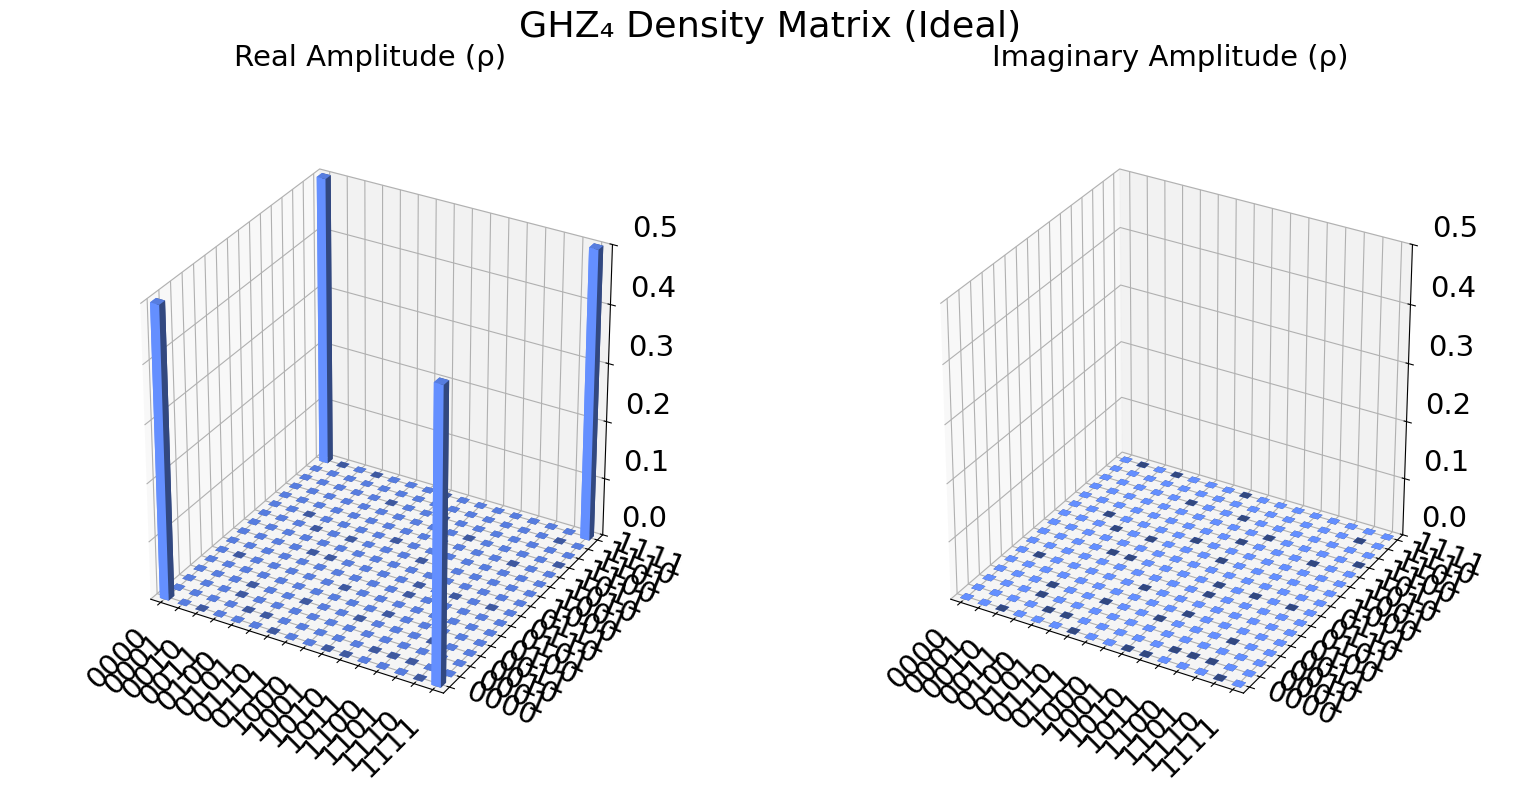

In [11]:
plot_state_city(rho, title="GHZ₄ Density Matrix (Ideal)")

In [12]:
# Simulate coincidence under phase rotation (interference fringe)

phases = np.linspace(0, 2 * np.pi, 100)
coincidences = []

for phi in phases:
    qc_phi = QuantumCircuit(4)
    qc_phi.h(0)
    for i in range(1, 4):
        qc_phi.cx(0, i)
    qc_phi.p(phi, 3)           # phase shift on one arm (like interferometer)

    # rotate all qubits to X-basis before measuring
    for q in range(4):
        qc_phi.h(q)
    qc_phi.measure_all()

    job_phi = backend.run(transpile(qc_phi, backend), shots=4096)
    result_phi = job_phi.result()
    counts_phi = result_phi.get_counts()

    # In X-basis, 4-fold “+ + + +” outcome corresponds to all-zero bits
    coincidence = counts_phi.get('0000', 0) / 4096
    coincidences.append(coincidence)

In [14]:
coincidences

[0.12890625,
 0.109619140625,
 0.119384765625,
 0.123291015625,
 0.10986328125,
 0.11865234375,
 0.12451171875,
 0.113525390625,
 0.11474609375,
 0.1142578125,
 0.11474609375,
 0.106689453125,
 0.106689453125,
 0.113037109375,
 0.098876953125,
 0.09814453125,
 0.093017578125,
 0.08740234375,
 0.087890625,
 0.08154296875,
 0.07470703125,
 0.072998046875,
 0.071044921875,
 0.0654296875,
 0.064208984375,
 0.04736328125,
 0.054443359375,
 0.0556640625,
 0.046875,
 0.044189453125,
 0.041259765625,
 0.040283203125,
 0.03515625,
 0.027587890625,
 0.03271484375,
 0.02685546875,
 0.023193359375,
 0.017578125,
 0.01513671875,
 0.011962890625,
 0.010009765625,
 0.0087890625,
 0.005859375,
 0.0048828125,
 0.003173828125,
 0.001708984375,
 0.0009765625,
 0.0009765625,
 0.0009765625,
 0.0,
 0.0,
 0.00048828125,
 0.00048828125,
 0.000244140625,
 0.003662109375,
 0.002685546875,
 0.00537109375,
 0.0068359375,
 0.0087890625,
 0.01025390625,
 0.014892578125,
 0.0146484375,
 0.019775390625,
 0.0190429687

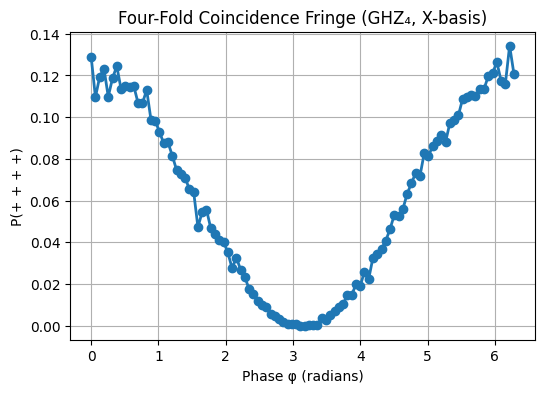

In [15]:
# Plot the interference fringe

plt.figure(figsize=(6,4))
plt.plot(phases, coincidences, 'o-', lw=2)
plt.title("Four-Fold Coincidence Fringe (GHZ₄, X-basis)")
plt.xlabel("Phase φ (radians)")
plt.ylabel("P(+ + + +)")
plt.grid(True)
plt.show()

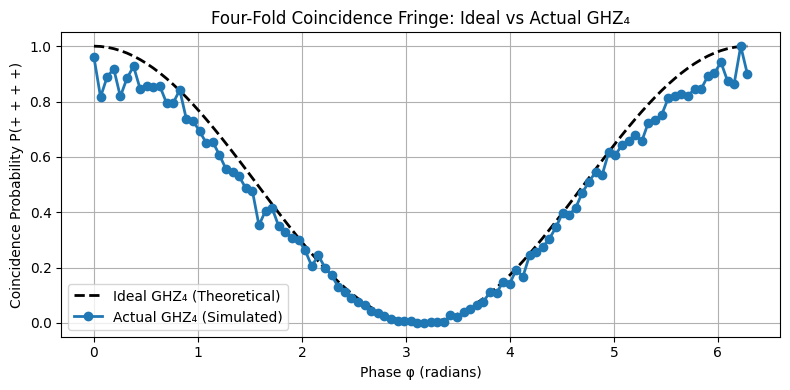

In [16]:

# Ideal vs Actual Four-Fold Coincidence Fringe (GHZ₄, X-basis)


import numpy as np
import matplotlib.pyplot as plt

# --- Your existing data ---
# 'phases'  -> np.linspace(0, 2*np.pi, 100)
# 'coincidences' -> from your simulation loop

# Compute ideal theoretical curve for comparison
P_ideal = 0.5 * (1 + np.cos(phases))

# Normalize your actual data (in case it’s not 0→1 range)
actual_norm = (np.array(coincidences) - np.min(coincidences)) / (np.max(coincidences) - np.min(coincidences))

# Plot both
plt.figure(figsize=(8, 4))
plt.plot(phases, P_ideal, 'k--', lw=2, label='Ideal GHZ₄ (Theoretical)')
plt.plot(phases, actual_norm, 'o-', lw=2, label='Actual GHZ₄ (Simulated)')
plt.title("Four-Fold Coincidence Fringe: Ideal vs Actual GHZ₄")
plt.xlabel("Phase φ (radians)")
plt.ylabel("Coincidence Probability P(+ + + +)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [19]:
# Simulate coincidence under phase rotation (interference fringe)

phases = np.linspace(0, 2 * np.pi, 100)
coincidences = []

for phi in phases:
    qc_phi = QuantumCircuit(4)
    qc_phi.h(0)
    for i in range(1, 4):
        qc_phi.cx(0, i)
    qc_phi.p(phi, 3)           # phase shift on one arm (like interferometer)

    # rotate all qubits to X-basis before measuring
    for q in range(4):
        qc_phi.h(q)
    qc_phi.measure_all()

    job_phi = backend.run(transpile(qc_phi, backend), shots=4096)
    result_phi = job_phi.result()
    counts_phi = result_phi.get_counts()

    # In X-basis, 4-fold “+ + + +” outcome corresponds to all-zero bits
    coincidence = counts_phi.get('1111', 0) / 4096
    coincidences.append(coincidence)

In [20]:
coincidences

[0.1240234375,
 0.12060546875,
 0.121826171875,
 0.123779296875,
 0.126953125,
 0.131103515625,
 0.11767578125,
 0.115234375,
 0.117431640625,
 0.107177734375,
 0.109375,
 0.1083984375,
 0.108154296875,
 0.111328125,
 0.10107421875,
 0.0986328125,
 0.08984375,
 0.088623046875,
 0.091552734375,
 0.085693359375,
 0.080078125,
 0.082275390625,
 0.070556640625,
 0.0712890625,
 0.06787109375,
 0.063720703125,
 0.056640625,
 0.056396484375,
 0.04833984375,
 0.049560546875,
 0.045166015625,
 0.040771484375,
 0.032470703125,
 0.029296875,
 0.030029296875,
 0.024169921875,
 0.021728515625,
 0.01953125,
 0.011962890625,
 0.013427734375,
 0.009033203125,
 0.0087890625,
 0.005615234375,
 0.006103515625,
 0.0029296875,
 0.001953125,
 0.001220703125,
 0.000732421875,
 0.000244140625,
 0.000244140625,
 0.0,
 0.000244140625,
 0.0009765625,
 0.00146484375,
 0.002685546875,
 0.003662109375,
 0.005859375,
 0.008056640625,
 0.008544921875,
 0.010009765625,
 0.01171875,
 0.018310546875,
 0.015625,
 0.01904

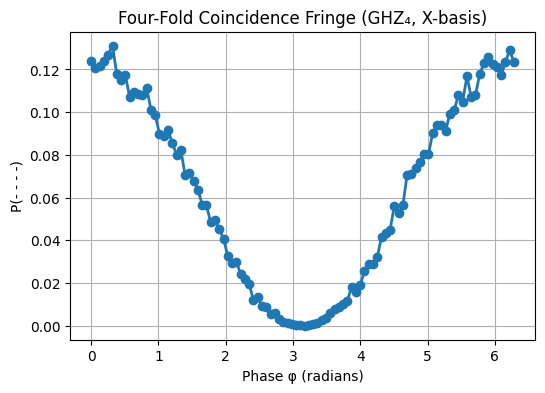

In [21]:
# Plot the interference fringe

plt.figure(figsize=(6,4))
plt.plot(phases, coincidences, 'o-', lw=2)
plt.title("Four-Fold Coincidence Fringe (GHZ₄, X-basis)")
plt.xlabel("Phase φ (radians)")
plt.ylabel("P(- - - -)")
plt.grid(True)
plt.show()

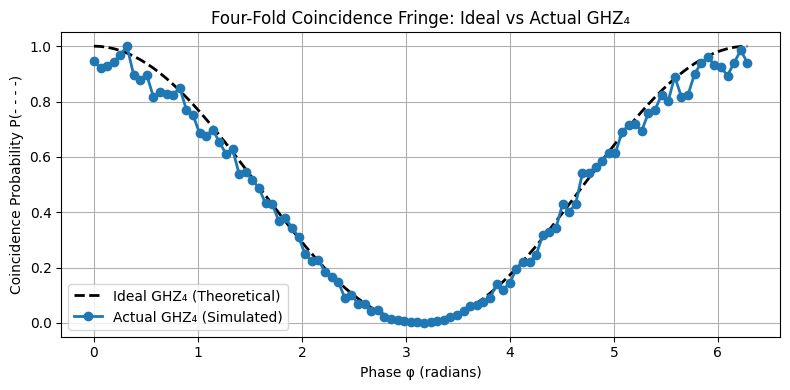

In [22]:

# Ideal vs Actual Four-Fold Coincidence Fringe (GHZ₄, X-basis)


import numpy as np
import matplotlib.pyplot as plt

# --- Your existing data ---
# 'phases'  -> np.linspace(0, 2*np.pi, 100)
# 'coincidences' -> from your simulation loop

# Compute ideal theoretical curve for comparison
P_ideal = 0.5 * (1 + np.cos(phases))

# Normalize your actual data (in case it’s not 0→1 range)
actual_norm = (np.array(coincidences) - np.min(coincidences)) / (np.max(coincidences) - np.min(coincidences))

# Plot both
plt.figure(figsize=(8, 4))
plt.plot(phases, P_ideal, 'k--', lw=2, label='Ideal GHZ₄ (Theoretical)')
plt.plot(phases, actual_norm, 'o-', lw=2, label='Actual GHZ₄ (Simulated)')
plt.title("Four-Fold Coincidence Fringe: Ideal vs Actual GHZ₄")
plt.xlabel("Phase φ (radians)")
plt.ylabel("Coincidence Probability P(- - - -)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# QUANTUM SECRET SHARING

Quantum Secret Sharing (QSS) is a cryptographic protocol that distributes a secret among multiple parties using the principles of quantum mechanics. Unlike classical secret sharing, where information can be copied or intercepted, QSS ensures that any unauthorized attempt to access the secret introduces detectable disturbances due to the no-cloning theorem and measurement-induced collapse.

In a typical (k, n) QSS scheme, a quantum secret is encoded into an entangled state such that:

Any k parties together can reconstruct the secret.

Any group with fewer than k members obtains no information about it.

A common way to implement QSS uses GHZ states, where entanglement correlations enable parties to jointly reconstruct the encoded quantum information.

I have implemented the Hillery–Bužek–Berthiaume 1999 (HBB99) Quantum Secret Sharing protocol. The goal of the protocol is to distribute a single-qubit secret among three participants (Alice, Bob, and Charlie) such that no single participant can reconstruct the secret alone, but two cooperating parties can.

In [4]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit_aer import AerSimulator
import numpy as np

In [5]:
alpha = 1/np.sqrt(2)
beta  = 1/np.sqrt(2)

In [6]:
q = QuantumRegister(4, "q")
c = ClassicalRegister(3, "c")
qc = QuantumCircuit(q, c, name="HBB99_QSS")

In [7]:
qc.initialize([alpha, beta], q[0])

In [8]:
#GHZ state
qc.h(q[1])
qc.cx(q[1], q[2])
qc.cx(q[1], q[3])

In [9]:
#Alice encodes secret onto GHZ: CNOT S->A, then H on S
qc.cx(q[0], q[1])
qc.h(q[0])

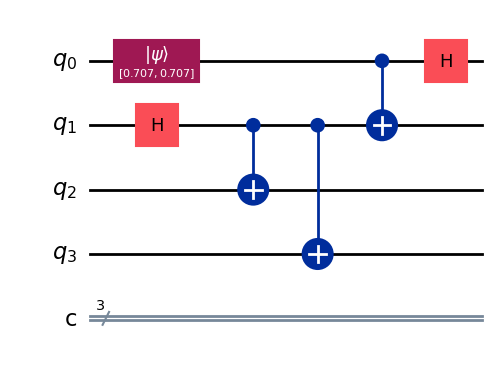

In [10]:
qc.draw('mpl')

In [11]:
qc.measure(q[0], c[0])   # m bit
qc.measure(q[1], c[1])   # a bit

In [12]:
# CONDITIONAL CORRECTIONS
# If a == 1 → value 2
with qc.if_test((c, 2)):
    qc.x(q[2])
    qc.x(q[3])

# If m == 1 → value 1
with qc.if_test((c, 1)):
    qc.z(q[2])

In [13]:
#Recovering the secret on q2 by applying CNOT(q2->q3). This maps alpha|00> + beta|11> -> (alpha|0> + beta|1>) ⊗ |0>
qc.cx(q[2], q[3])

In [14]:
qc.measure(q[2], c[2])

In [15]:
sim = AerSimulator()
tqc = transpile(qc, sim)
job = sim.run(tqc, shots=4096)
result = job.result()
counts = result.get_counts()

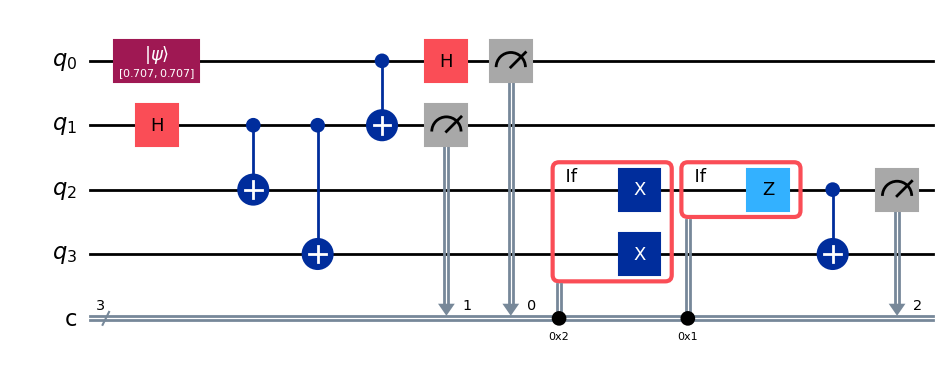

In [16]:
qc.draw('mpl')

In [18]:
print("\nReconstructed secret values:")
for bitstr, cnt in sorted(counts.items(), key=lambda x: -x[1]):
    reconstructed = bitstr[0]   # leftmost bit = c2
    print(f"secret={reconstructed},  count={cnt}")


Reconstructed secret values:
secret=1,  count=541
secret=0,  count=534
secret=1,  count=524
secret=0,  count=515
secret=1,  count=514
secret=0,  count=493
secret=1,  count=492
secret=0,  count=483
